In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(columns=['day','month','year'], inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), "not fire", "fire")

In [9]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [11]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
## independent and dependent features
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

In [16]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [17]:
## ferature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.669720,-0.334140,-0.353265,0.677623,0.487571,0.389471,0.602026,0.467013,0.546279,0.283242
RH,-0.669720,1.000000,0.204591,0.222707,-0.649486,-0.428679,-0.266198,-0.707446,-0.383706,-0.463607,-0.401123
Ws,-0.334140,0.204591,1.000000,0.128902,-0.174288,-0.006788,0.058934,0.004938,0.020047,-0.098821,-0.181108
Rain,-0.353265,0.222707,0.128902,1.000000,-0.566291,-0.319280,-0.312623,-0.364699,-0.327179,-0.386251,-0.035181
FFMC,0.677623,-0.649486,-0.174288,-0.566291,1.000000,0.608838,0.520211,0.743021,0.600643,0.774048,0.248338
DMC,0.487571,-0.428679,-0.006788,-0.319280,0.608838,1.000000,0.885047,0.690427,0.983489,0.591989,0.193025
DC,0.389471,-0.266198,0.058934,-0.312623,0.520211,0.885047,1.000000,0.536126,0.944205,0.500287,-0.063488
ISI,0.602026,-0.707446,0.004938,-0.364699,0.743021,0.690427,0.536126,1.000000,0.664122,0.752023,0.280281
BUI,0.467013,-0.383706,0.020047,-0.327179,0.600643,0.983489,0.944205,0.664122,1.000000,0.589880,0.096093
Classes,0.546279,-0.463607,-0.098821,-0.386251,0.774048,0.591989,0.500287,0.752023,0.589880,1.000000,0.231666


<Axes: >

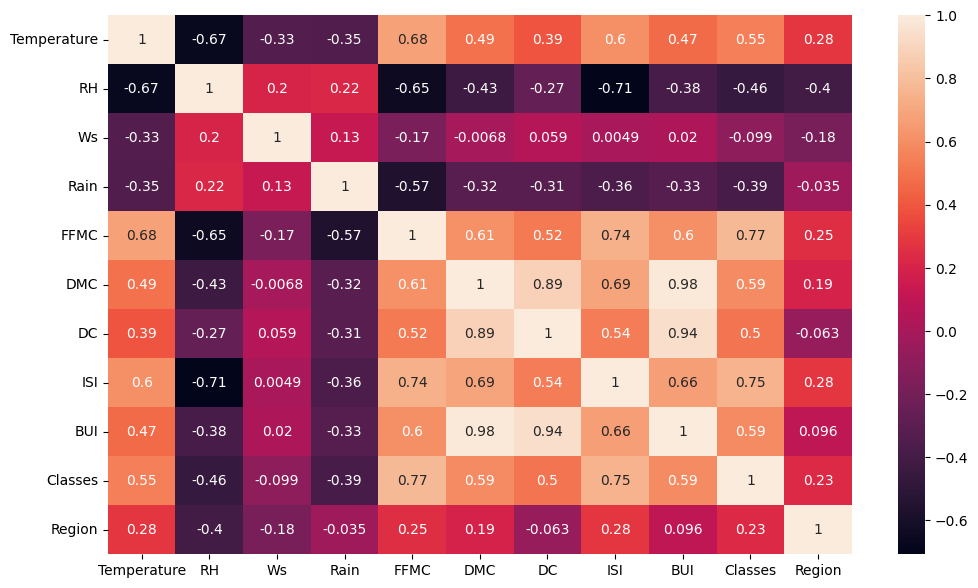

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(X_train.corr(), annot=True)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## set the threshold by domain expertise 
corr_features=correlation(X_train, .85)

In [21]:
## remove these highly correlated features
X_train.drop(corr_features, axis=1, inplace=True)

In [22]:
X_test.drop(corr_features, axis=1, inplace=True)

In [23]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [24]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.82246204, -0.13248758, -0.96126494, ..., -0.8800242 ,
        -1.0921406 , -1.        ],
       [-1.64946806,  1.26631775,  2.29867702, ..., -1.04641643,
        -1.0921406 , -1.        ],
       [ 1.38288736, -1.73112224, -0.96126494, ...,  1.66339986,
         0.91563303,  1.        ],
       ...,
       [ 0.28021266, -2.46382979, -0.96126494, ...,  2.25765782,
         0.91563303,  1.        ],
       [-0.54679336,  0.06734175, -0.59904916, ..., -0.59478038,
        -1.0921406 ,  1.        ],
       [-1.09813071,  1.06648841, -1.32348071, ..., -0.80871325,
        -1.0921406 , -1.        ]])

Text(0.5, 1.0, 'X train after Scaling')

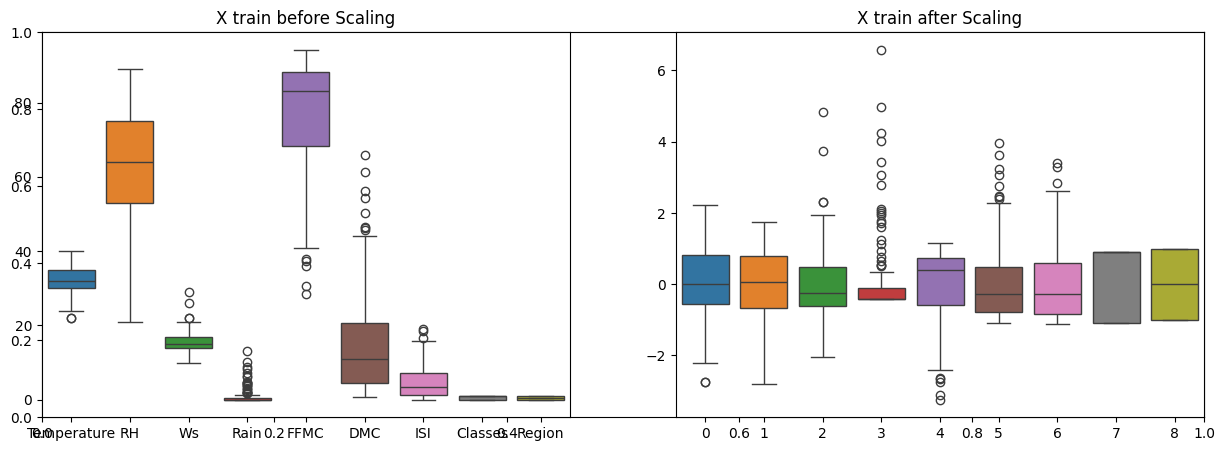

In [26]:
## box plot to understand the effects of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X train after Scaling")

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.6097576371929305
R2 Score:  0.9845036003441805


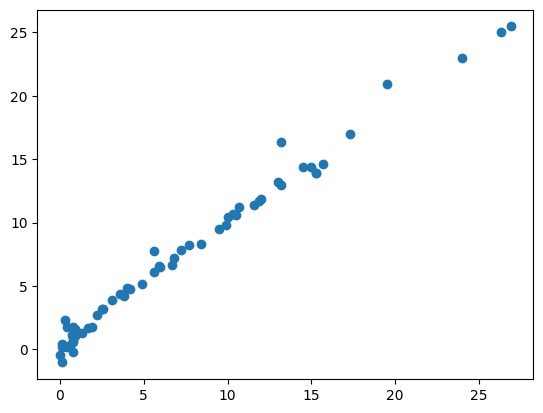

In [28]:
plt.scatter(y_test, y_pred)

In [29]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.6045787458662935
R2 Score:  0.9849363575693157


In [30]:
lassocv.alpha_

np.float64(0.03023939599481777)

In [31]:
lassocv.alphas_

array([6.98569268, 6.51488037, 6.07579924, 5.66631071, 5.28442033,
       4.92826809, 4.59611931, 4.28635625, 3.99747019, 3.72805408,
       3.47679571, 3.24247131, 3.0239396 , 2.82013619, 2.63006845,
       2.45281064, 2.28749941, 2.13332961, 1.98955033, 1.8554613 ,
       1.73040942, 1.61378561, 1.50502186, 1.40358843, 1.30899127,
       1.22076964, 1.13849385, 1.06176317, 0.99020389, 0.92346746,
       0.86122884, 0.8031849 , 0.74905293, 0.69856927, 0.65148804,
       0.60757992, 0.56663107, 0.52844203, 0.49282681, 0.45961193,
       0.42863563, 0.39974702, 0.37280541, 0.34767957, 0.32424713,
       0.30239396, 0.28201362, 0.26300685, 0.24528106, 0.22874994,
       0.21333296, 0.19895503, 0.18554613, 0.17304094, 0.16137856,
       0.15050219, 0.14035884, 0.13089913, 0.12207696, 0.11384938,
       0.10617632, 0.09902039, 0.09234675, 0.08612288, 0.08031849,
       0.07490529, 0.06985693, 0.0651488 , 0.06075799, 0.05666311,
       0.0528442 , 0.04928268, 0.04596119, 0.04286356, 0.03997

In [32]:
lassocv.mse_path_

array([[86.6492239 , 51.30631046, 38.1987913 , 47.115098  , 59.76108479],
       [86.6492239 , 47.83826474, 34.43213058, 41.58721442, 54.03326784],
       [79.3145338 , 44.781746  , 30.53432675, 36.53077488, 47.6167367 ],
       [72.40284119, 41.96153571, 26.96704393, 31.86678817, 41.78910288],
       [66.2778524 , 36.89941043, 23.84799024, 27.86327098, 36.70598071],
       [60.84475143, 32.48349568, 21.12027568, 24.43053141, 32.27128782],
       [56.02055639, 28.63071376, 18.73376093, 21.49068409, 28.40132716],
       [51.73261281, 25.26852787, 16.64495378, 18.97685928, 25.0237187 ],
       [47.91728097, 22.33408603, 14.81596299, 16.83046442, 22.07497312],
       [43.3680861 , 19.77179966, 13.21355702, 15.00094527, 19.49997689],
       [37.91161906, 17.53414214, 11.80942224, 13.44424462, 17.25074483],
       [33.16223453, 15.57944449, 10.57823911, 12.12301455, 15.28533576],
       [29.02781811, 13.87142361,  9.49815015, 11.00413658, 13.5677077 ],
       [25.42747435, 12.37877977,  8.5

## Lasso Regression

Mean Absolute Error:  1.1914563426451288
R2 Score:  0.9507719280238188


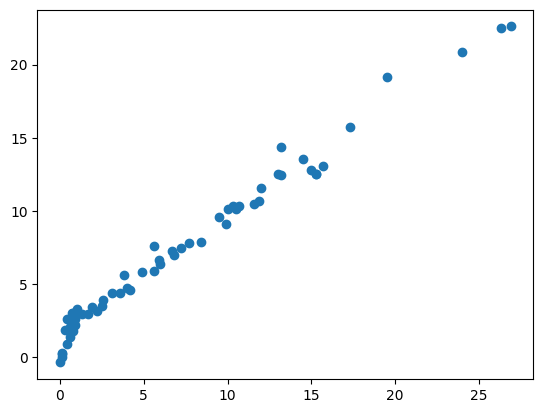

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.6329143779561437
R2 Score:  0.983692581331822


In [35]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Ridge Regression

Mean Absolute Error:  0.6329143779561437
R2 Score:  0.983692581331822


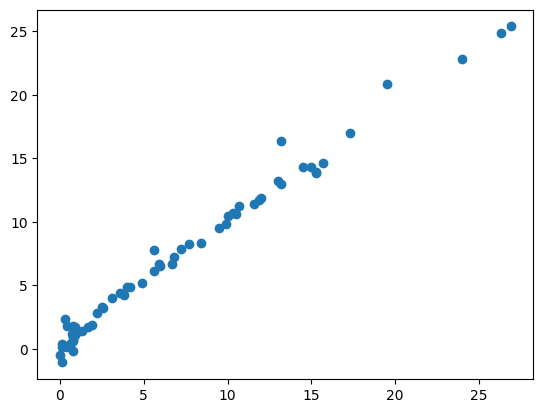

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)

In [37]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)

Mean Absolute Error:  0.6609066409966181
R2 Score:  0.9828892867661194


In [38]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## ElasticNet

Mean Absolute Error:  1.8874633328409456
R2 Score:  0.8803445600259008


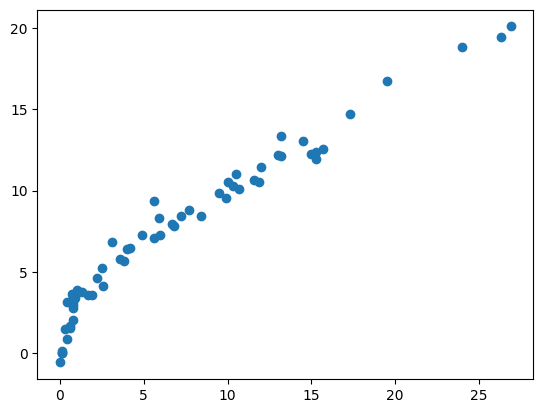

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)

## Pickel the model and preprocesssing model 

In [40]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(lassocv, open("lassoCV.pkl", "wb"))